**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')

**IMPORTING FILE**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving travel.sqlite to travel.sqlite


**ESTABLISHING CONNECTION**

In [ ]:
#Databse connection
conn = sqlite3.connect('travel.sqlite')

In [ ]:
cursor=conn.cursor()

**DISPLAYING ALL TABLE NAMES**

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tables in the database:")
table_list = [i[0] for i in cursor.fetchall()]
table_list

Tables in the database:


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [ ]:
aircraft_df=pd.read_sql_query("SELECT * FROM aircrafts_data",conn)
aircraft_df.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [ ]:
airport_data=pd.read_sql_query("SELECT * FROM airports_data",conn)
airport_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [ ]:
boarding_passes=pd.read_sql_query("SELECT * FROM boarding_passes",conn)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [ ]:
bookings=pd.read_sql_query("SELECT * FROM bookings",conn)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [ ]:
flights=pd.read_sql_query("SELECT * FROM flights",conn)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [ ]:
seats=pd.read_sql_query("SELECT * FROM seats",conn)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [ ]:
ticket_flights=pd.read_sql_query("SELECT * FROM ticket_flights",conn)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [ ]:
tickets=pd.read_sql_query("SELECT * FROM tickets",conn)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


**CHECKING FOR NULL VALUES IN ALL TABLES**

In [ ]:
for table in table_list:
  print('\ntable:',table)
  df=pd.read_sql_query(f"SELECT * FROM {table}",conn)
  print(df.isnull().sum())


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


**TOTAL REVENUE**

In [ ]:
# sum of amount from bookings
pd.read_sql_query("SELECT SUM(total_amount) as total_revenue FROM bookings",conn)

,total_revenue
0,20766980900


**REVENUE GENERATED BY DIFFERENT CLASS**

In [ ]:
# amount by fare conditions
x=pd.read_sql_query("SELECT fare_conditions,SUM(amount) as total_revenue FROM ticket_flights GROUP BY fare_conditions",conn)
x

,fare_conditions,total_revenue
0,Business,5505179600
1,Comfort,566116900
2,Economy,14695684400


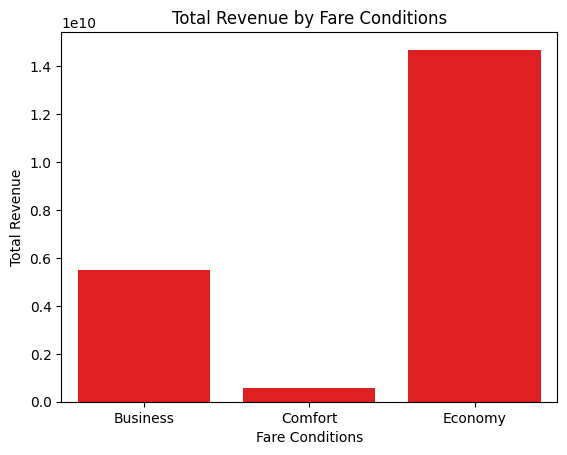

In [ ]:
sns.barplot(x='fare_conditions',y='total_revenue',data=x,color='r')
plt.xlabel('Fare Conditions')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Fare Conditions')
plt.show()

**TOP 5 AIRCRAFTS WITH MOST BOOKINGS**

In [ ]:
# top 5 aircraft which has most bookings
x=pd.read_sql_query("""SELECT aircraft_code,COUNT(*) as total_bookings FROM flights
       GROUP BY aircraft_code ORDER BY total_bookings DESC LIMIT 5""",conn)
x

,aircraft_code,total_bookings
0,CN1,9273
1,CR2,9048
2,SU9,8504
3,321,1952
4,733,1274


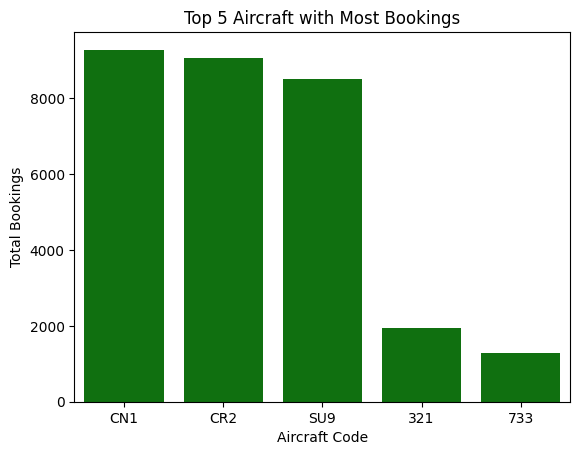

In [ ]:
sns.barplot(x='aircraft_code',y='total_bookings',data=x,color='g')
plt.xlabel('Aircraft Code')
plt.ylabel('Total Bookings')
plt.title('Top 5 Aircraft with Most Bookings')
plt.show()

**AIRCRAFT BOOKINGS WITH DIFFERENT CLASS**

In [ ]:
# aircrafrt code by total bookings in fare_conditions
x=pd.read_sql_query("""SELECT aircraft_code,fare_conditions,COUNT(*) as total_bookings FROM flights
       INNER JOIN ticket_flights ON flights.flight_id=ticket_flights.flight_id
       GROUP BY aircraft_code,fare_conditions ORDER BY aircraft_code""",conn)
x

,aircraft_code,fare_conditions,total_bookings
0,319,Business,9055
1,319,Economy,43798
2,321,Business,17573
3,321,Economy,89556
4,733,Business,7977
5,733,Economy,78125
6,763,Business,16801
7,763,Economy,107973
8,773,Business,10821
9,773,Comfort,17291


Text(0.5, 1.0, 'Total Bookings by Aircraft Code and Fare Conditions')

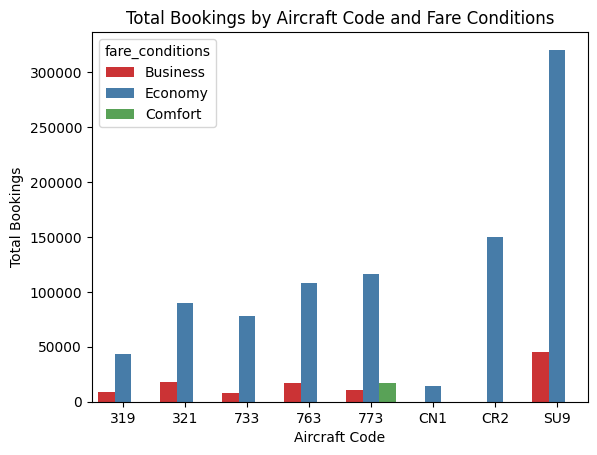

In [ ]:
sns.barplot(x='aircraft_code',y='total_bookings',hue='fare_conditions',data=x,palette='Set1')
plt.xlabel('Aircraft Code')
plt.ylabel('Total Bookings')
plt.title('Total Bookings by Aircraft Code and Fare Conditions')

**AIRCRAFT HAVING RANGE MORE THAN 6000KM**

In [ ]:
# aircraft code by range having more than 6000KM
pd.read_sql_query("""SELECT aircraft_code,range FROM aircrafts_data WHERE range>6000""",conn)

,aircraft_code,range
0,773,11100
1,763,7900
2,319,6700


In [ ]:
tkt=pd.read_sql_query("""select * from tickets join bookings on tickets.book_ref=bookings.book_ref""",conn)

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400


**NUMBER OF TICKETS BOOKED ON EACH DATE**

Text(0.5, 1.0, 'Number of Tickets Booked on Each Day')

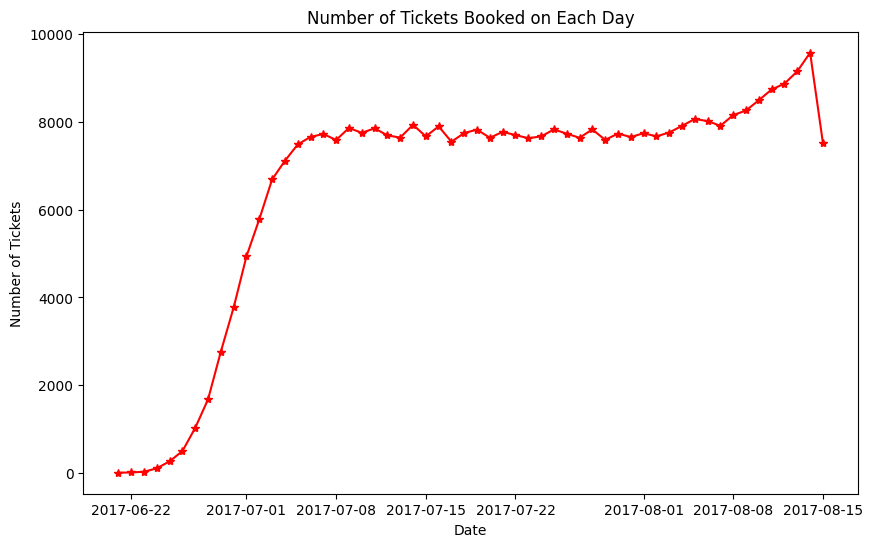

In [ ]:
tkt['book_date']=pd.to_datetime(tkt['book_date'])
tkt['date']=tkt['book_date'].dt.date
t=tkt.groupby('date')[['date']].count()
plt.figure(figsize=(10,6))
plt.plot(t.index,t['date'],marker='*',linestyle='-',color='r')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets Booked on Each Day')

**SUM OF AMOUNT ON EACH DATE**

Text(0.5, 1.0, 'Total Amount on Each Date')

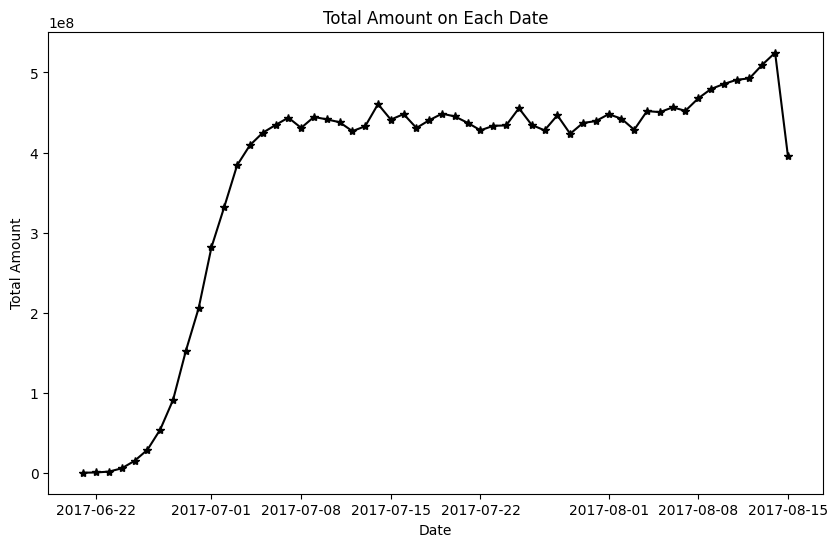

In [ ]:
# sum of amount on each date
bk=pd.read_sql_query("""select * from bookings""",conn)
bk['book_date']=pd.to_datetime(bk['book_date'])
bk['date']=bk['book_date'].dt.date
u=bk.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(10,6))
plt.plot(u.index,u['total_amount'],marker='*',linestyle='-',color='black')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Total Amount on Each Date')